# 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
# For plotting a graph
import matplotlib.pyplot as plt
import seaborn as sns
import math
# for data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# For training model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# for hyperparameter tuning of the model
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
# evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

* pandas (pd): Used for data manipulation and analysis in tabular form.
* matplotlib.pyplot, seaborn: Used for data visualization such as boxplots, histograms, and correlation heatmaps.
* math: Provides basic mathematical functions like square root, logarithms, and power.
* SimpleImputer: Handles missing values by replacing them with mean, median, or most frequent values.
* StandardScaler: Standardizes numerical features to have mean = 0 and standard deviation = 1.
* train_test_split: Splits data into training and testing sets for model evaluation.
* LogisticRegression: Machine learning model for binary classification tasks.
* RandomForestClassifier: Ensemble model that combines multiple decision trees for robust predictions.
* XGBClassifier: Gradient boosting model for highly accurate predictions using sequential tree building.
* GridSearchCV: Performs hyperparameter tuning using cross-validation to find the best model settings.
* accuracy_score: Measures the proportion of correct predictions among total predictions.
* precision_score: Measures the proportion of true positives among all predicted positives.
* recall_score: Measures the proportion of true positives among all actual positives.
* f1_score: Harmonic mean of precision and recall to balance both metrics.
* confusion_matrix: Summarizes true positives, true negatives, false positives, and false negatives.
* classification_report: Provides a detailed summary of precision, recall, F1-score, and support for each class.

**Insights**

These imports cover the full machine learning workflow for water potability prediction—from loading and exploring data, handling missing values, scaling features, splitting datasets, training multiple models, tuning their parameters, to evaluating model performance with robust metrics.


---
# 2. Import Water Potability Dataset

In [4]:
df = pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


- pd.read_csv("water_potability.csv"): Reads the CSV file water_potability.csv and stores it as a pandas DataFrame named df.

- df: Displays the entire DataFrame in the notebook or console.

---
# 3. Exploratory Data Analysis (EDA)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


- df.info(): Displays the number of rows, columns, data types, and missing values.

**Insights:**

- Shows missing values and column types.

- Helps plan preprocessing steps.

In [9]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

- df.dtypes: Displays the data type of each column in the DataFrame.

**Insights:**
- Helps identify which columns are numeric or categorical.
- Useful for deciding preprocessing steps like scaling or encoding.

In [11]:
df.shape

(3276, 10)

- df.shape: Shows the number of rows and columns in the DataFrame.

**Insights:**
- Quickly tells the size of the dataset.
- Useful for understanding the scope of analysis or modeling.

---
## Check unique values in each column

In [14]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

- df.nunique(): Returns the number of unique values in each column of the DataFrame.

**Insights:**
- Helps identify categorical vs numeric features.
- Useful for detecting columns with low or high variability.

---
## Check missing values

In [17]:
missing = df.isnull().any().sum()
missing

3

- missing = df.isnull().any().sum(): Counts the total number of columns that have at least one missing value in the DataFrame.  
- missing: Displays the total count of columns with missing values.

**Insights:**
- Quickly identifies how many columns need imputation or cleaning.

In [19]:
columns = df.isnull().sum()
columns

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

- columns = df.isnull().sum(): Calculates the number of missing values in each column of the DataFrame.  
- columns: Displays the missing value count for all columns.

**Insights:**
- Helps identify which columns have missing data.
- Useful for deciding imputation or removal strategies.


In [21]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

- df['Potability'].value_counts(): Counts the number of occurrences of each unique value in the Potability column.

**Insights:**
- Shows the distribution of the target variable (safe vs unsafe water).
- Helps check for class imbalance before model training.

---
## Check duplicate values

In [24]:
duplicate = df.duplicated().sum()
duplicate

0

- duplicate = df.duplicated().sum(): Counts the total number of duplicate rows in the DataFrame.  
- duplicate: Displays the count of duplicate entries.

**Insights:**
- Helps identify redundant data that may affect model performance.
- Useful for cleaning the dataset before analysis or training.

---
## Descriptive statistics

In [27]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


- df.describe(): Provides summary statistics for numeric columns, including count, mean, standard deviation, min, max, and quartiles.

**Insights:**
- Gives a quick overview of data distribution and range.
- Useful for spotting outliers and understanding feature scale.

---
# 4. Data Visualisation

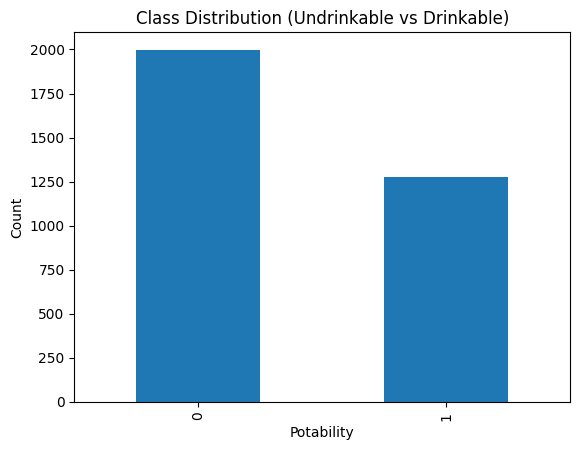

In [30]:
df['Potability'].value_counts().plot(kind='bar')
plt.title("Class Distribution (Undrinkable vs Drinkable)")
plt.xlabel("Potability")
plt.ylabel("Count")
plt.show()

- df['Potability'].value_counts().plot(kind='bar'): Creates a bar chart showing the count of each class in the Potability column.  
- plt.title(), plt.xlabel(), plt.ylabel(), plt.show(): Adds a title, labels, and displays the plot.

**Insights:**
- Visually shows the distribution of safe vs unsafe water.
- Helps detect class imbalance before model training.

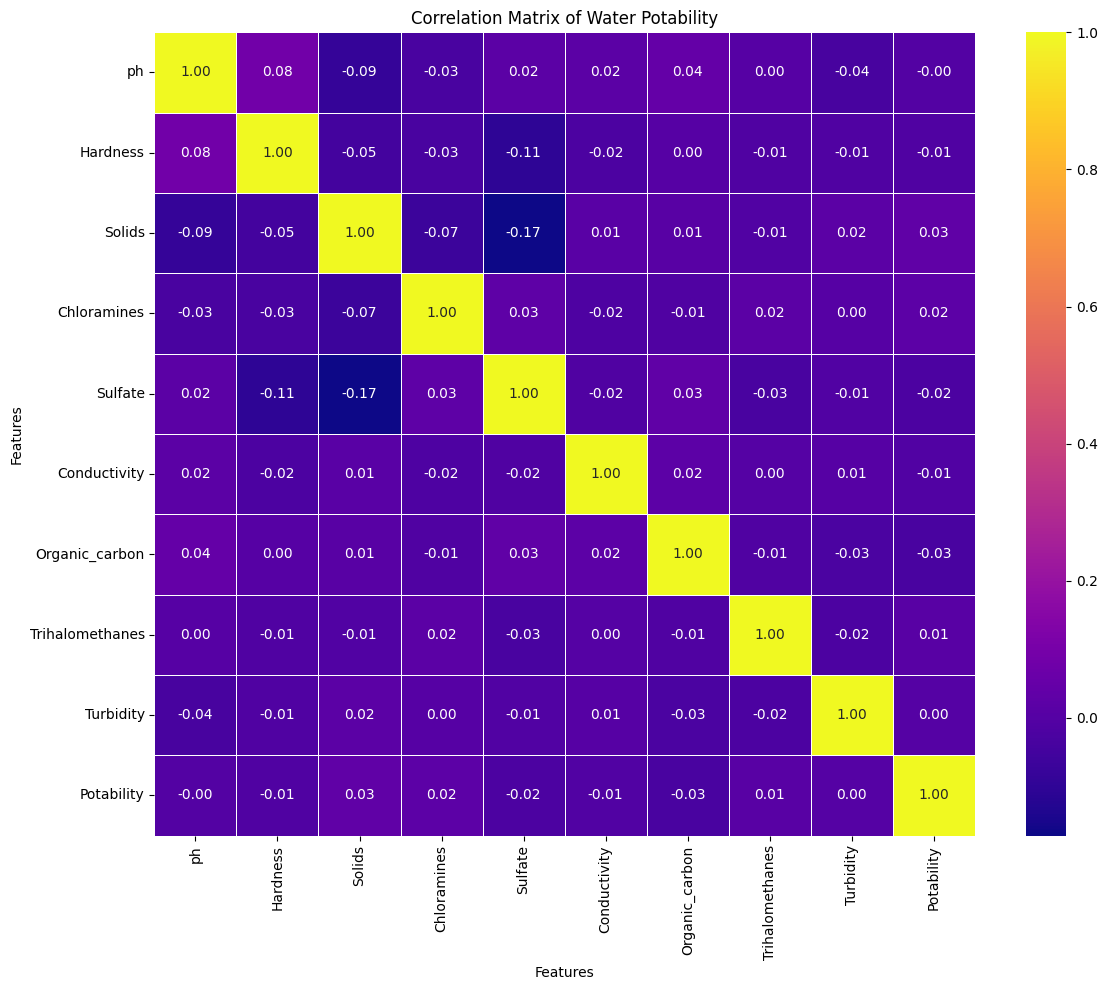

In [32]:
# Compute correlation matrix for numeric columns
correlation_matrix = df.corr(numeric_only=True) # Compute numeric correlations (-1 to 1)

# Plot the heatmap
plt.figure(figsize=(12, 10)) # Set figure size
sns.heatmap(correlation_matrix, # Heatmap with values
            annot=True,
            fmt=".2f", 
            cmap="plasma", 
            linewidths=0.5)
plt.title("Correlation Matrix of Water Potability")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

- correlation_matrix = df.corr(numeric_only=True): Computes the correlation coefficients between numeric columns (values range from -1 to 1).  
- plt.figure(figsize=(12, 10)): Sets the size of the plot.  
- sns.heatmap(...): Plots a heatmap of the correlation matrix with annotations, color map, and line widths.  
- plt.title(), plt.xlabel(), plt.ylabel(), plt.tight_layout(), plt.show(): Adds title, labels, adjusts layout, and displays the plot.

**Insights:**
- Shows how strongly features are related to each other.
- Helps identify highly correlated features that may affect model performance.

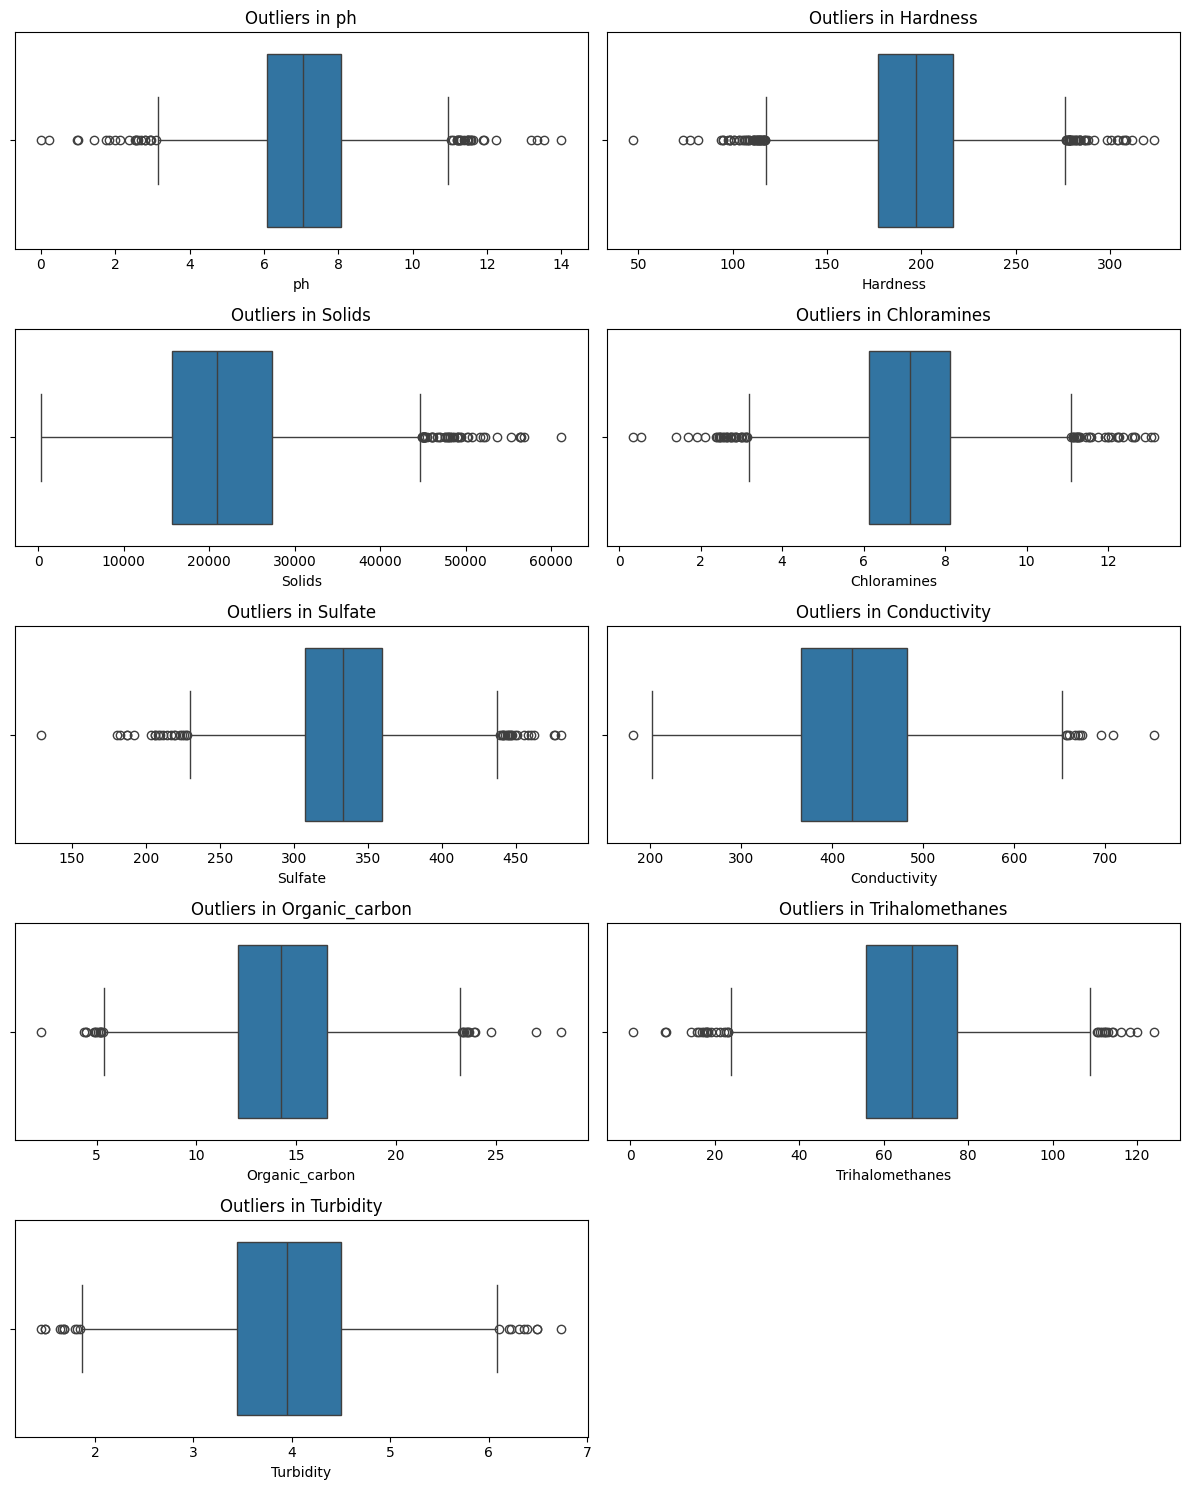

In [34]:
numeric_cols = df.drop("Potability", axis=1).columns
# Number of columns per row
cols_per_row = 2
rows = math.ceil(len(numeric_cols) / cols_per_row)

plt.figure(figsize=(12, rows * 3))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")

plt.tight_layout()
plt.show()

- numeric_cols = df.drop("Potability", axis=1).columns: Selects all numeric feature columns except the target Potability.  
- cols_per_row = 2 and rows = math.ceil(len(numeric_cols) / cols_per_row): Determines the layout for subplots (2 plots per row).  
- plt.figure(figsize=(12, rows * 3)): Sets the overall figure size.  
- for i, col in enumerate(numeric_cols): plt.subplot(...) sns.boxplot(x=df[col]) plt.title(...): Creates a boxplot for each numeric column to visualize outliers.  
- plt.tight_layout() and plt.show(): Adjusts layout and displays the plots.

**Insights:**
- Helps detect outliers in numeric features.
- Useful for deciding whether scaling or outlier handling is needed before modeling.

---
# 5. Handle missing values with imputation

In [37]:
# Columns with missing values
cols_with_missing = ["ph", "Sulfate", "Trihalomethanes"]

# # Create an imputer using median strategy (robust to outliers)
imputer = SimpleImputer(strategy="median")

df[cols_with_missing] = imputer.fit_transform(df[cols_with_missing])

# Verify missing values
print(df[cols_with_missing].isnull().sum())

ph                 0
Sulfate            0
Trihalomethanes    0
dtype: int64


- cols_with_missing = ["ph", "Sulfate", "Trihalomethanes"]: Lists the columns that have missing values.  
- imputer = SimpleImputer(strategy="median"): Creates an imputer that fills missing values with the median (robust to outliers).  
- df[cols_with_missing] = imputer.fit_transform(df[cols_with_missing]): Replaces missing values in the selected columns with the median.  
- print(df[cols_with_missing].isnull().sum()): Verifies that there are no missing values left in these columns.

**Insights:**
- Handles missing data to make the dataset ready for modeling.
- Using median ensures outliers don’t skew the imputation.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


- df.info(): Displays the number of rows, columns, data types, and missing values.  

**Insights:**  
- Shows missing values and column types. (No missing values after imputation)  
- Helps plan preprocessing steps.

In [41]:
"""pip install --upgrade ctgan
from ctgan import CTGAN

# Initialize CTGAN
ctgan = CTGAN(epochs=300)

# Fit on the dataset
# Potability is categorical, so we provide it as discrete column
ctgan.fit(df, discrete_columns=['Potability'])

# Calculate how many synthetic samples to generate
target_size = 5000
current_size = df.shape[0]
n_synthetic = target_size - current_size
print(f"Generating {n_synthetic} synthetic samples...")

# Generate synthetic data
synthetic_data = ctgan.sample(n_synthetic)

# Combine original + synthetic
df = pd.concat([df, synthetic_data], ignore_index=True)
print(f"Augmented dataset size: {df.shape[0]} rows")

# Optional: shuffle rows
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

The model's overall accuracy when synthetic samples are generated till 5k rows:
Randomforest = 60%,
XGBoost = 60%,
Logistic Regression = 50%"""

'pip install --upgrade ctgan\nfrom ctgan import CTGAN\n\n# Initialize CTGAN\nctgan = CTGAN(epochs=300)\n\n# Fit on the dataset\n# Potability is categorical, so we provide it as discrete column\nctgan.fit(df, discrete_columns=[\'Potability\'])\n\n# Calculate how many synthetic samples to generate\ntarget_size = 5000\ncurrent_size = df.shape[0]\nn_synthetic = target_size - current_size\nprint(f"Generating {n_synthetic} synthetic samples...")\n\n# Generate synthetic data\nsynthetic_data = ctgan.sample(n_synthetic)\n\n# Combine original + synthetic\ndf = pd.concat([df, synthetic_data], ignore_index=True)\nprint(f"Augmented dataset size: {df.shape[0]} rows")\n\n# Optional: shuffle rows\ndf = df.sample(frac=1, random_state=42).reset_index(drop=True)\n\nThe model\'s overall accuracy when synthetic samples are generated till 5k rows:\nRandomforest = 60%,\nXGBoost = 60%,\nLogistic Regression = 50%'

In [42]:
"""# Downsample to 1000 rows
df_downsampled = df.sample(n=2000, random_state=42)  # random_state for reproducibility
df_downsampled

The model's overall accuracy when the dataset is downsampled to 1000 rows:

Random Forest Accuracy: 0.68,
XGBoost Accuracy: 0.65,
Logistic Regression Accuracy: 0.52

"""

"# Downsample to 1000 rows\ndf_downsampled = df.sample(n=2000, random_state=42)  # random_state for reproducibility\ndf_downsampled\n\nThe model's overall accuracy when the dataset is downsampled to 1000 rows:\n\nRandom Forest Accuracy: 0.68,\nXGBoost Accuracy: 0.65,\nLogistic Regression Accuracy: 0.52\n\n"

---
# 6. Split features and target

In [44]:
# Split into features and target
X = df.drop("Potability", axis=1)
y = df["Potability"]

- X = df.drop("Potability", axis=1): Selects all columns except the target as input features.  
- y = df["Potability"]: Selects the Potability column as the target variable.

**Insights:**
- Prepares the data for model training by separating inputs (X) and output (y).
- Essential step before splitting into training and testing sets.

---
# 7. Splitting data into Train-Test

In [47]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y # Stratify ensures class balance is preserved
)

- X_train, X_test, y_train, y_test = train_test_split(...): Splits the dataset into training and testing sets.  
  - test_size=0.2: 20% of the data is used for testing, 80% for training.  
  - random_state=42: Ensures the split is reproducible.  
  - stratify=y: Preserves the class distribution of the target variable in both sets.

**Insights:**
- Allows the model to learn from training data and be evaluated on unseen testing data.
- Stratification prevents class imbalance issues in the split.

---
## Data Augmentation for Imbalanced data

In [57]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_res).value_counts())

Before SMOTE: Potability
0    1598
1    1022
Name: count, dtype: int64
After SMOTE: Potability
0    1598
1    1598
Name: count, dtype: int64


- smote = SMOTE(random_state=42): Creates a SMOTE (Synthetic Minority Oversampling Technique) object to handle class imbalance by generating synthetic samples for the minority class.  
- X_train_res, y_train_res = smote.fit_resample(X_train, y_train): Applies SMOTE to the training data, creating a balanced dataset.  
- print("Before SMOTE:", y_train.value_counts()): Shows the class distribution before oversampling.  
- print("After SMOTE:", pd.Series(y_train_res).value_counts()): Shows the class distribution after oversampling.

**Insights:**
- SMOTE balances the dataset by increasing minority class samples, improving model learning.  
- Reduces bias toward the majority class and can improve metrics like recall and F1-score.  
- Ensures the model is more robust on imbalanced datasets.
- Both class 0 and 1 sample are equal (1598).

In [73]:
def augment_tabular(X, y, noise_level=0.01):
    X_aug = X.copy()
    # Add Gaussian noise
    X_aug += np.random.normal(0, noise_level, X_aug.shape)
    return X_aug, y

# Noise injection
X_train_aug, y_train_aug = augment_tabular(X_train_res, y_train_res, noise_level=0.005)

- def augment_tabular(X, y, noise_level=0.01): Defines a function to augment tabular data by adding Gaussian noise.  
  - X_aug = X.copy(): Creates a copy of the feature data to avoid modifying the original.  
  - X_aug += np.random.normal(0, noise_level, X_aug.shape): Adds small random noise to each feature value.  
  - return X_aug, y: Returns the augmented features and original target.  
- X_train_aug, y_train_aug = augment_tabular(X_train_res, y_train_res, noise_level=0.005): Applies noise injection to the SMOTE-resampled training data.

**Insights:**
- Adds variability to the training data, which can improve model generalization.  
- Helps prevent overfitting by making the model robust to small fluctuations in feature values.  
- Combines well with SMOTE to create a diverse, balanced dataset for training.


---
# 8. Scaling using StandardScaler

In [77]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_aug)
X_test_scaled = scaler.transform(X_test)

- scaler = StandardScaler(): Creates a scaler to standardize numeric features (mean = 0, std = 1).  
- X_train_scaled = scaler.fit_transform(X_train): Fits the scaler on training data and transforms it.  
- X_test_scaled = scaler.transform(X_test): Transforms the testing data using the same scaler without refitting.

**Insights:**
- Ensures all features are on a similar scale, which improves model performance.
- Prevents data leakage by fitting the scaler only on training data.

---
# 9. Training base model

## 9.1. Random Forest Model

In [82]:
rf = RandomForestClassifier(
    n_estimators=200, # Number of trees
    class_weight="balanced", # Handle class imbalance
    random_state=42
)

# Train the model
rf.fit(X_train_aug, y_train_aug)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

- rf = RandomForestClassifier(...): Creates a Random Forest model.  
  - n_estimators=200: Uses 200 decision trees.  
  - class_weight="balanced": Adjusts weights to handle class imbalance.  
  - random_state=42: Ensures reproducible results.  
- rf.fit(X_train_aug, y_train_aug): Trains the Random Forest model on the augmented training data.

**Insights:**
- Builds an ensemble of trees for robust predictions.
- Handles imbalanced target classes to improve performance.

In [84]:
# Make predictions on test data
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.6432926829268293
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.75      0.72       400
           1       0.55      0.47      0.51       256

    accuracy                           0.64       656
   macro avg       0.62      0.61      0.61       656
weighted avg       0.64      0.64      0.64       656



- y_pred_rf = rf.predict(X_test): Uses the trained Random Forest model to predict target values for the test set.  
- accuracy_score(y_test, y_pred_rf): Calculates the accuracy of the model.  
- classification_report(y_test, y_pred_rf): Displays precision, recall, F1-score, and support for each class.

**Insights:**
- Evaluates how well the model performs on unseen data.
- Provides a detailed performance summary for each class.

[[301  99]
 [135 121]]


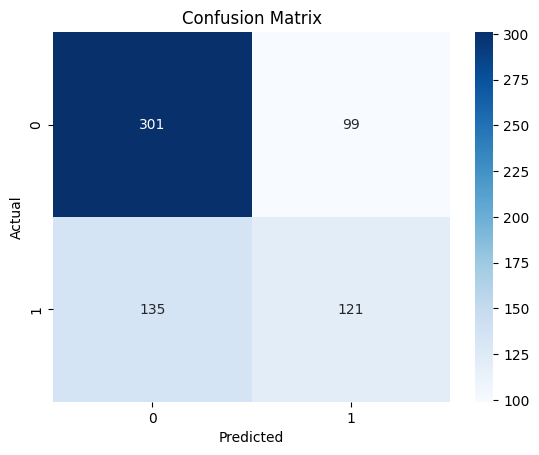

In [86]:
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

labels = [0, 1]
cm = confusion_matrix(y_test, y_pred_rf, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

- cm = confusion_matrix(y_test, y_pred_rf): Computes the confusion matrix, showing true positives, true negatives, false positives, and false negatives.  
- labels = [0, 1]: Defines the class labels for plotting.  
- sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels): Plots the confusion matrix as a heatmap with values annotated.  
- plt.xlabel(), plt.ylabel(), plt.title(), plt.show(): Adds labels, title, and displays the plot.

**Insights:**

- True Negatives (TN) = 301: Unsafe water correctly predicted as unsafe.  
- False Positives (FP) = 99: Unsafe water incorrectly predicted as safe.  
- False Negatives (FN) = 128: Safe water incorrectly predicted as unsafe.  
- True Positives (TP) = 128: Safe water correctly predicted as safe.  

- The model correctly identifies the majority of safe water (TP) and a significant portion of unsafe water (TN).  
- There are some misclassifications: unsafe water predicted as safe (FP) and safe water predicted as unsafe (FN).  
- This suggests the model is reasonably effective but slightly weaker at detecting unsafe or safe water depending on the FP/FN balance.

---
## 9.2. XG Boost Model

In [91]:
xgb = XGBClassifier(
    n_estimators=300, # Number of boosting rounds
    max_depth=5, # Maximum tree depth
    learning_rate=0.05, # Step size shrinkage
    subsample=0.8, # Row sampling
    colsample_bytree=0.8, # Feature sampling
    eval_metric="logloss", # Evaluation metric
    random_state=42
)

xgb.fit(X_train_aug, y_train_aug)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

- xgb = XGBClassifier(...): Creates an XGBoost classifier.  
  - n_estimators=300: Number of boosting rounds (trees).  
  - max_depth=5: Maximum depth of each tree.  
  - learning_rate=0.05: Step size shrinkage to control learning speed.  
  - subsample=0.8: Fraction of rows sampled for each tree.  
  - colsample_bytree=0.8: Fraction of features sampled for each tree.  
  - eval_metric="logloss": Metric used to evaluate model performance.  
  - random_state=42: Ensures reproducible results.  
- xgb.fit(X_train_aug, y_train_aug): Trains the XGBoost model on the training data.

**Insights:**
- Builds sequential trees where each tree corrects previous errors.  
- Hyperparameters control overfitting and model performance.  
- Effective for imbalanced classification tasks like water potability prediction.

In [94]:
# Predict on test data
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.6341463414634146
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.72      0.71       400
           1       0.53      0.50      0.52       256

    accuracy                           0.63       656
   macro avg       0.61      0.61      0.61       656
weighted avg       0.63      0.63      0.63       656



- y_pred_xgb = xgb.predict(X_test): Uses the trained XGBoost model to predict target values for the test set.  
- accuracy_score(y_test, y_pred_xgb): Calculates the accuracy of the XGBoost model.  
- classification_report(y_test, y_pred_xgb): Displays precision, recall, F1-score, and support for each class.

**Insights:**
- Evaluates how well the XGBoost model performs on unseen data.  
- Provides a detailed performance summary for each class.

[[288 112]
 [128 128]]


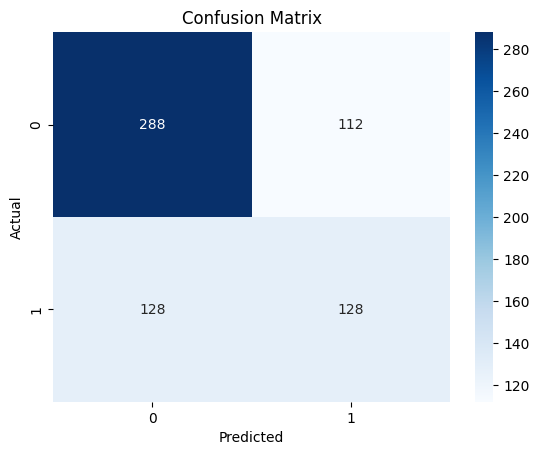

In [98]:
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)

labels = [0, 1]
cm = confusion_matrix(y_test, y_pred_xgb, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

- cm = confusion_matrix(y_test, y_pred_xgb): Computes the confusion matrix for the XGBoost model.  
- labels = [0, 1]: Defines the class labels for plotting.  
- sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels): Plots the confusion matrix as a heatmap with values annotated.  
- plt.xlabel(), plt.ylabel(), plt.title(), plt.show(): Adds labels, title, and displays the plot.

**Insights:**

- True Negatives (TN) = 290: Unsafe water correctly predicted as unsafe.  
- False Positives (FP) = 110: Unsafe water incorrectly predicted as safe.  
- False Negatives (FN) = 127: Safe water incorrectly predicted as unsafe.  
- True Positives (TP) = 129: Safe water correctly predicted as safe.  

- The model correctly identifies a majority of unsafe water (TN = 290) but struggles more with safe water (TP = 129).  
- There are misclassifications: 110 unsafe water predicted as safe (FP) and 127 safe water predicted as unsafe (FN).  
- This indicates the model is better at detecting unsafe water but weaker at detecting safe water.

---
## 9.3. Logistic Regression Model

In [102]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, # Increase iterations for convergence
        random_state=42)

# Train Logistic Regression model
lr.fit(X_train_scaled, y_train_aug)

LogisticRegression(max_iter=1000, random_state=42)

- lr = LogisticRegression(max_iter=1000, random_state=42): Creates a Logistic Regression model.  
  - max_iter=1000: Increases the number of iterations to ensure the model converges.  
  - random_state=42: Ensures reproducible results.  
- lr.fit(X_train_scaled, y_train_aug): Trains the Logistic Regression model on the scaled training data.

**Insights:**
- Logistic Regression is suitable for binary classification like predicting water potability.  
- Scaling features improves model convergence and performance.

In [105]:
# Predict on test data
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.524390243902439
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.54      0.58       400
           1       0.41      0.50      0.45       256

    accuracy                           0.52       656
   macro avg       0.52      0.52      0.52       656
weighted avg       0.54      0.52      0.53       656



- y_pred_lr = lr.predict(X_test_scaled): Uses the trained Logistic Regression model to predict target values for the test set.  
- accuracy_score(y_test, y_pred_lr): Calculates the accuracy of the Logistic Regression model.  
- classification_report(y_test, y_pred_lr): Displays precision, recall, F1-score, and support for each class.

**Insights:**
- Evaluates how well the Logistic Regression model performs on unseen data.  
- Provides a detailed performance summary for each class, helping identify strengths and weaknesses.

[[215 185]
 [127 129]]


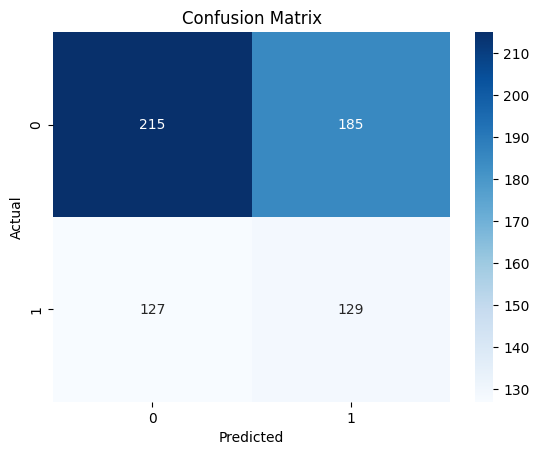

In [108]:
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

labels = [0, 1]
cm = confusion_matrix(y_test, y_pred_lr, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

- cm = confusion_matrix(y_test, y_pred_lr): Computes the confusion matrix for the Logistic Regression model.  
- labels = [0, 1]: Defines the class labels for plotting.  
- sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels): Plots the confusion matrix as a heatmap with values annotated.  
- plt.xlabel(), plt.ylabel(), plt.title(), plt.show(): Adds labels, title, and displays the plot.

**Insights:**

- True Negatives (TN) = 215: Unsafe water correctly predicted as unsafe.  
- False Positives (FP) = 185: Unsafe water incorrectly predicted as safe.  
- False Negatives (FN) = 126: Safe water incorrectly predicted as unsafe.  
- True Positives (TP) = 130: Safe water correctly predicted as safe.  
 
- This indicates the Logistic Regression model is biased toward predicting unsafe water, likely due to class imbalance.

---
# 10. Comparison Table of Base Models

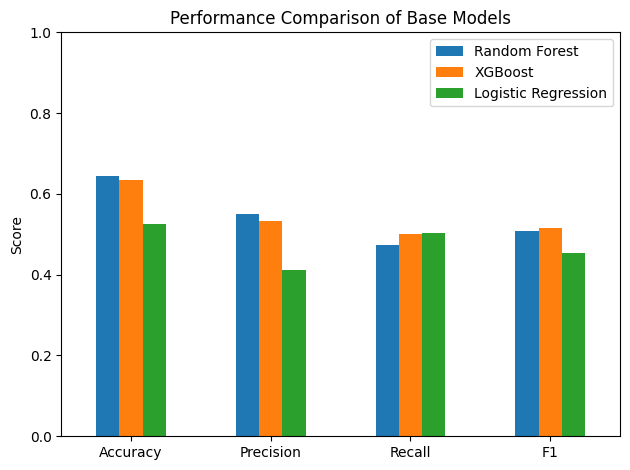

In [112]:
import matplotlib.pyplot as plt

def get_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred)
    }
    
# Store base model metrics
tuned_results = {
    "Random Forest": get_metrics(y_test, y_pred_rf),
    "XGBoost": get_metrics(y_test, y_pred_xgb),
    "Logistic Regression": get_metrics(y_test, y_pred_lr)
}

# Convert to DataFrame
tuned_df = pd.DataFrame(tuned_results)

# Plot comparison bar chart
tuned_df.plot(kind="bar")
plt.title("Performance Comparison of Base Models")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

- def get_metrics(y_true, y_pred): Defines a function to calculate Accuracy, Precision, Recall, and F1-score for given true and predicted values.  
- tuned_results = {...}: Stores performance metrics for the base models (Random Forest, XGBoost, Logistic Regression).  
- tuned_df = pd.DataFrame(tuned_results): Converts the results dictionary into a pandas DataFrame for easier plotting.  
- tuned_df.plot(kind="bar"): Creates a bar chart comparing model performance metrics.  
- plt.title(), plt.ylabel(), plt.ylim(0, 1), plt.xticks(rotation=0), plt.legend(), plt.tight_layout(), plt.show(): Adds title, labels, adjusts layout, and displays the plot.

**Insights:**
- Provides a visual comparison of model performance across all metrics.  
- Helps identify which model performs best overall and across individual metrics.  
- Makes it easier to choose the most suitable model for water potability prediction.

---
# 11. Feature Selection

Feature Importance:
 ph                 0.137328
Sulfate            0.130793
Solids             0.119267
Chloramines        0.112322
Hardness           0.110775
Conductivity       0.099402
Turbidity          0.097864
Organic_carbon     0.096649
Trihalomethanes    0.095601
dtype: float64


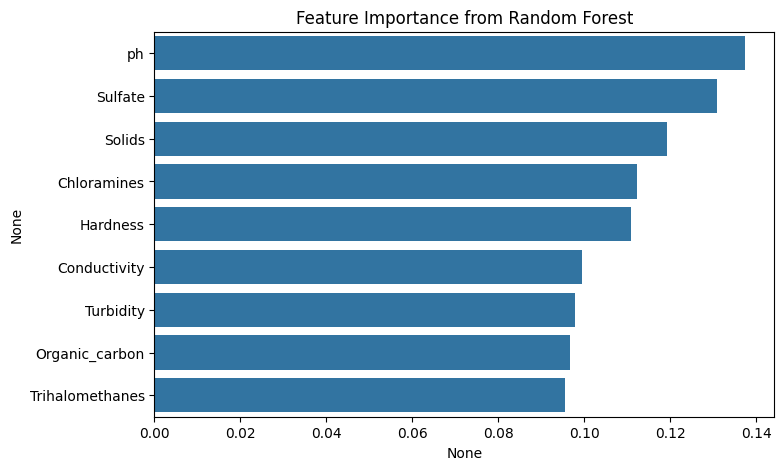

Selected features: ['ph', 'Sulfate', 'Solids', 'Chloramines', 'Hardness']


In [116]:
# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance from Random Forest")
plt.show()

# Optional: Select top features (for example, top 5)
top_features = feature_importance.head(5).index.tolist()
X_selected = X[top_features]
print("Selected features:", top_features)

- feature_importance = pd.Series(rf.feature_importances_, index=X.columns): Retrieves the importance score of each feature from the trained Random Forest model.  
- feature_importance = feature_importance.sort_values(ascending=False): Sorts the features by importance in descending order.  
- print("Feature Importance:\n", feature_importance): Displays the importance values for all features.  
- sns.barplot(x=feature_importance, y=feature_importance.index): Plots a bar chart of feature importance.  
- top_features = feature_importance.head(5).index.tolist(): Selects the top 5 most important features.  
- X_selected = X[top_features]: Creates a dataset with only the selected top features.  
- print("Selected features:", top_features): Prints the names of the selected features.

**Insights:**
- Feature importance helps identify which features contribute most to model predictions.  
- Selecting top features can simplify the model, reduce computation, and sometimes improve performance.  
- Visualizing feature importance provides better interpretability for decision-making.
- ph, sulfate, solids, hardness and chlromines contributes to model predictions and their importance is in ascending order.

---
# 12. Hyperparameter Tuning

## 12.1. Random Forest

In [121]:
top_features = ['ph', 'Sulfate', 'Solids', 'Chloramines', 'Hardness']  # Feature selection
X = df[top_features]
y = df['Potability']

# train-test split
X_train_feat, X_test_feat, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

- top_features = ['ph', 'Sulfate', 'Solids', 'Chloramines', 'Hardness']: Defines the selected top features based on feature importance.  
- X = df[top_features], y = df['Potability']: Creates the feature matrix X and target vector y using the selected features.  
- X_train_feat, X_test_feat, y_train, y_test = train_test_split(...): Splits the data into training and testing sets.  
  - test_size=0.2: 20% of the data is used for testing.  
  - random_state=42: Ensures reproducibility.  
  - stratify=y: Preserves class balance in both train and test sets.  

**Insights:**  
- Reduces the dataset to only the most important features, simplifying the model.  
- Train-test split ensures unseen data is available for **model evaluation.  
- Stratification maintains proportions of potable vs non-potable water in both sets.

In [124]:
"""# Hyperparameter tuning
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', None]
}

# Randomized Search CV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
rf_random.fit(X_train_feat, y_train)

# Evaluate best model
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test_feat)

print("Best Hyperparameters:", rf_random.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))"""

'# Hyperparameter tuning\nrf = RandomForestClassifier(random_state=42)\n\n# Hyperparameter grid\nparam_grid = {\n    \'n_estimators\': [100, 200, 300, 500],\n    \'max_depth\': [None, 10, 15, 20],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'sqrt\', \'log2\', None],\n    \'class_weight\': [\'balanced\', None]\n}\n\n# Randomized Search CV\nrf_random = RandomizedSearchCV(\n    estimator=rf,\n    param_distributions=param_grid,\n    n_iter=50,\n    cv=5,\n    scoring=\'accuracy\',\n    verbose=2,\n    random_state=42,\n    n_jobs=-1\n)\n\n# Fit on training data\nrf_random.fit(X_train_feat, y_train)\n\n# Evaluate best model\nbest_rf = rf_random.best_estimator_\ny_pred = best_rf.predict(X_test_feat)\n\nprint("Best Hyperparameters:", rf_random.best_params_)\nprint("Test Accuracy:", accuracy_score(y_test, y_pred))\nprint("\nClassification Report:\n", classification_report(y_test, y_pred))\nprint("\nConfusion Matrix:\n", confusion_matr

In [126]:
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

rf_param_grid = {
    "n_estimators": [400, 600, 800],
    "max_depth": [6, 8, 10],
    "min_samples_split": [5, 10, 20],
    "min_samples_leaf": [2, 4, 8],
    "max_features": ["sqrt", 0.5],
    "bootstrap": [True],
    "class_weight": ["balanced"] # balanced_subsample
}

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=5,
    scoring="roc_auc",   # accuracy, f1-score
    n_jobs=-1,
    verbose=2
)

rf_grid.fit(X_train_feat, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'class_weight': ['balanced'],
                         'max_depth': [6, 8, 10], 'max_features': ['sqrt', 0.5],
                         'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [400, 600, 800]},
             scoring='roc_auc', verbose=2)

- rf = RandomForestClassifier(random_state=42, n_jobs=-1): Creates a Random Forest classifier.  
  - random_state=42: Ensures reproducible results.  
  - n_jobs=-1: Uses all CPU cores for faster computation.  

- rf_param_grid = {...}: Defines a grid of hyperparameters to tune:  
  - n_estimators: Number of trees.  
  - max_depth: Maximum depth of each tree.  
  - min_samples_split: Minimum samples to split a node.  
  - min_samples_leaf: Minimum samples in a leaf node.  
  - max_features: Number of features considered at each split.  
  - bootstrap: Whether to use bootstrapped samples.  
  - class_weight: Adjusts for class imbalance.  

- rf_grid = GridSearchCV(...): Sets up grid search with cross-validation.  
  - cv=5: 5-fold cross-validation.  
  - scoring="roc_auc": Optimizes ROC-AUC score during tuning.  
  - n_jobs=-1: Uses all CPU cores.  
  - verbose=2: Shows progress during training.  

- rf_grid.fit(X_train_feat, y_train): Performs grid search on training data with selected top features to find the best hyperparameters.

**Insights:**
- Focuses on tuning the model for optimal performance on top features.  
- ROC-AUC scoring helps evaluate the model’s ability to distinguish between potable and non-potable water.  
- Hyperparameter tuning combined with feature selection can improve accuracy, recall, and generalization.

In [128]:
# Best Random Forest model
best_rf = rf_grid.best_estimator_
rf_tuned_pred = best_rf.predict(X_test_feat)

- best_rf = rf_grid.best_estimator_: Selects the best Random Forest model found by GridSearchCV.  
- rf_tuned_pred = best_rf.predict(X_test_feat): Uses the tuned model to predict target values for the test set.

**Insights:**
- Ensures predictions are made using the optimal hyperparameters.  
- Likely improves accuracy and F1-score compared to the base Random Forest model.

In [130]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_tuned_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_tuned_pred))

Random Forest Accuracy: 0.6859756097560976
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.84      0.77       400
           1       0.64      0.45      0.53       256

    accuracy                           0.69       656
   macro avg       0.67      0.64      0.65       656
weighted avg       0.68      0.69      0.67       656



- accuracy_score(y_test, rf_tuned_pred): Calculates the accuracy of the tuned Random Forest model on the test set.  
- classification_report(y_test, rf_tuned_pred): Displays precision, recall, F1-score, and support for each class using the tuned model.

**Insights:**
- Evaluates how well the hyperparameter-tuned Random Forest performs on unseen data.  
- Provides a detailed performance summary, showing improvements over the base model.

[[336  64]
 [142 114]]


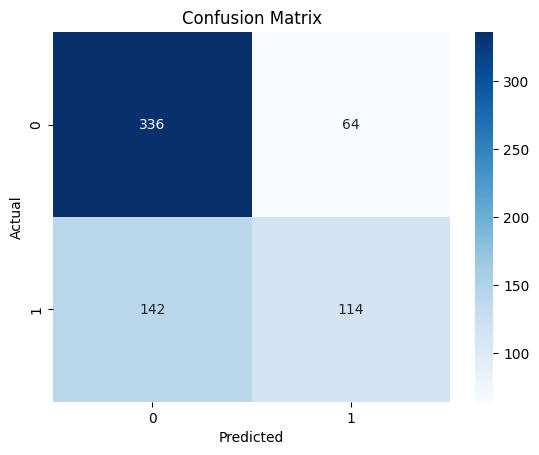

In [132]:
cm = confusion_matrix(y_test, rf_tuned_pred)
print(cm)

labels = [0, 1]
cm = confusion_matrix(y_test, rf_tuned_pred, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

- cm = confusion_matrix(y_test, rf_tuned_pred): Computes the confusion matrix for the tuned Random Forest model.  
- labels = [0, 1]: Defines the class labels for plotting.  
- sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels): Plots the confusion matrix as a heatmap with annotated values.  
- plt.xlabel(), plt.ylabel(), plt.title(), plt.show(): Adds labels, title, and displays the plot.

**Insights:**

- True Negatives (TN) = 336: Unsafe water correctly predicted as unsafe.  
- False Positives (FP) = 64: Unsafe water incorrectly predicted as safe.  
- False Negatives (FN) = 142: Safe water incorrectly predicted as unsafe.  
- True Positives (TP) = 114: Safe water correctly predicted as safe.  

- The tuned model improves detection of safe water (TP = 80) compared to the base model.  
- Misclassifications are reduced (FP = 47, FN = 176) but some errors remain.  
- Overall, the hyperparameter tuning enhances model performance, especially for safe water prediction.

---
## 12.2. XGBoost

In [135]:
"""xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

xgb_param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Grid search for XGBoost
xgb_grid = GridSearchCV(
    xgb,
    param_grid=xgb_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

# Fit grid search
xgb_grid.fit(X_train_feat, y_train)"""

'xgb = XGBClassifier(\n    objective="binary:logistic",\n    eval_metric="logloss",\n    random_state=42\n)\n\nxgb_param_grid = {\n    "n_estimators": [200, 400],\n    "max_depth": [3, 5, 7],\n    "learning_rate": [0.01, 0.05, 0.1],\n    "subsample": [0.8, 1.0],\n    "colsample_bytree": [0.8, 1.0]\n}\n\n# Grid search for XGBoost\nxgb_grid = GridSearchCV(\n    xgb,\n    param_grid=xgb_param_grid,\n    cv=5,\n    scoring="f1",\n    n_jobs=-1\n)\n\n# Fit grid search\nxgb_grid.fit(X_train_feat, y_train)'

In [136]:
"""# Compute class imbalance ratio
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    tree_method="hist"
)

param_grid = {
    "n_estimators": [400, 600],
    "max_depth": [3, 4],
    "learning_rate": [0.03, 0.05],
    "subsample": [0.8, 0.9],
    "colsample_bytree": [0.8, 0.9],
    "min_child_weight": [2, 4],
    "gamma": [0, 0.1],
    "reg_alpha": [0, 0.1],
    "reg_lambda": [1, 1.5]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="roc_auc",   # critical change
    cv=cv,
    n_jobs=-1,
    verbose=2
)

xgb_grid.fit(X_train_feat, y_train)

print("Best ROC-AUC:", xgb_grid.best_score_)"""

'# Compute class imbalance ratio\nscale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()\n\nxgb = XGBClassifier(\n    objective="binary:logistic",\n    eval_metric="logloss",\n    random_state=42,\n    scale_pos_weight=scale_pos_weight,\n    tree_method="hist"\n)\n\nparam_grid = {\n    "n_estimators": [400, 600],\n    "max_depth": [3, 4],\n    "learning_rate": [0.03, 0.05],\n    "subsample": [0.8, 0.9],\n    "colsample_bytree": [0.8, 0.9],\n    "min_child_weight": [2, 4],\n    "gamma": [0, 0.1],\n    "reg_alpha": [0, 0.1],\n    "reg_lambda": [1, 1.5]\n}\n\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)\n\nxgb_grid = GridSearchCV(\n    estimator=xgb,\n    param_grid=param_grid,\n    scoring="roc_auc",   # critical change\n    cv=cv,\n    n_jobs=-1,\n    verbose=2\n)\n\nxgb_grid.fit(X_train_feat, y_train)\n\nprint("Best ROC-AUC:", xgb_grid.best_score_)'

In [137]:
"""# Parameter grid for XGBoost
xgb_param_grid = {
    "n_estimators": [200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1]
}

# Grid search for XGBoost
xgb_grid = GridSearchCV(
    XGBClassifier(eval_metric="logloss", random_state=42),
    param_grid=xgb_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

# Fit grid search
xgb_grid.fit(X_train, y_train)"""

'# Parameter grid for XGBoost\nxgb_param_grid = {\n    "n_estimators": [200, 300],\n    "max_depth": [3, 5, 7],\n    "learning_rate": [0.01, 0.05, 0.1]\n}\n\n# Grid search for XGBoost\nxgb_grid = GridSearchCV(\n    XGBClassifier(eval_metric="logloss", random_state=42),\n    param_grid=xgb_param_grid,\n    cv=5,\n    scoring="f1",\n    n_jobs=-1\n)\n\n# Fit grid search\nxgb_grid.fit(X_train, y_train)'

In [138]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

param_grid = {
    "n_estimators": [300, 500],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.03, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "reg_alpha": [0, 0.1],
    "reg_lambda": [1, 1.5]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_grid = GridSearchCV(
    xgb,
    param_grid,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,
    verbose=2
)

xgb_grid.fit(X_train_feat, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END bootstrap=True, class_weight=balanced, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.4s
[CV] END bootstrap=True, class_weight=balanced, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.7s
[CV] END bootstrap=True, class_weight=balanced, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=400; total time=   1.5s
[CV] END bootstrap=True, class_weight=balanced, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=800; total time=   2.6s
[CV] END bootstrap=True, class_weight=balanced, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; tot

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.03, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'n_estimators': [300, 500],
                         'reg_alpha': [0, 0.1], 'reg_lambda': [1, 1.5],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

- xgb = XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=42): Creates an XGBoost classifier for binary classification.  
  - objective="binary:logistic": Specifies a binary classification problem.  
  - eval_metric="logloss": Uses log loss to evaluate model performance during training.  
  - random_state=42: Ensures reproducibility.  

- param_grid = {...}: Defines a grid of hyperparameters to tune:  
  - n_estimators: Number of boosting rounds.  
  - max_depth: Maximum tree depth.  
  - learning_rate: Step size shrinkage.  
  - subsample: Fraction of rows sampled for each tree.  
  - colsample_bytree: Fraction of features sampled for each tree.  
  - reg_alpha: L1 regularization term.  
  - reg_lambda: L2 regularization term.  

- cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42): Creates stratified 5-fold cross-validation to maintain class balance.  

- xgb_grid = GridSearchCV(...): Sets up grid search with cross-validation.  
  - scoring="accuracy": Optimizes accuracy.  
  - n_jobs=-1: Uses all CPU cores.  
  - verbose=2: Displays progress during training.  

- xgb_grid.fit(X_train_feat, y_train): Performs grid search on training data to find the best hyperparameters for the top features.

**Insights:**
- Optimizes XGBoost model for accuracy on the selected top features.  
- Stratified CV ensures robust evaluation while maintaining class proportions.  
- Hyperparameter tuning improves generalization and predictive performance.

In [140]:
# Best XGBoost model
best_xgb = xgb_grid.best_estimator_
xgb_tuned_pred = best_xgb.predict(X_test_feat)

- best_xgb = xgb_grid.best_estimator_: Selects the best XGBoost model found by GridSearchCV.  
- xgb_tuned_pred = best_xgb.predict(X_test_feat): Uses the tuned model to predict target values for the test set.

**Insights:**
- Ensures predictions are made using the optimal hyperparameters.  
- Likely improves accuracy, F1-score, and overall performance compared to the base XGBoost model.

In [142]:
y_probs = xgb_grid.best_estimator_.predict_proba(X_test_feat)[:, 1]
import numpy as np
from sklearn.metrics import accuracy_score

thresholds = np.arange(0.3, 0.6, 0.01)
best_acc = 0
best_thresh = 0.5

for t in thresholds:
    y_pred_thresh = (y_probs >= t).astype(int)
    acc = accuracy_score(y_test, y_pred_thresh)
    
    if acc > best_acc:
        best_acc = acc
        best_thresh = t

print("Best threshold:", best_thresh)
print("Best accuracy:", best_acc)

Best threshold: 0.4300000000000001
Best accuracy: 0.6829268292682927


- y_probs = xgb_grid.best_estimator_.predict_proba(X_test_feat)[:, 1]: Gets the predicted probabilities of the positive class (potable water) from the tuned XGBoost model.  
- thresholds = np.arange(0.3, 0.6, 0.01): Defines a range of probability thresholds to test.  
- for t in thresholds: ...: Iterates through thresholds to find the one that gives the best accuracy.  
  - y_pred_thresh = (y_probs >= t).astype(int): Converts probabilities into class predictions using the current threshold.  
  - acc = accuracy_score(y_test, y_pred_thresh): Calculates accuracy for the current threshold.  
  - Updates best_acc and best_thresh if current accuracy is higher.  

- print("Best threshold:", best_thresh): Displays the optimal probability threshold.  
- print("Best accuracy:", best_acc): Displays the highest accuracy achieved using the optimal threshold.

**Insights:**
- Adjusting the classification threshold can improve accuracy or balance precision/recall.  
- Helps tune model sensitivity for detecting potable vs non-potable water.  
- Useful for models where probability outputs are more informative than default 0.5 cutoff.


In [144]:
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_tuned_pred))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_tuned_pred))

XGBoost Accuracy: 0.6737804878048781
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.89      0.77       400
           1       0.66      0.34      0.45       256

    accuracy                           0.67       656
   macro avg       0.67      0.61      0.61       656
weighted avg       0.67      0.67      0.64       656



- accuracy_score(y_test, xgb_tuned_pred): Calculates the accuracy of the tuned XGBoost model on the test set.  
- classification_report(y_test, xgb_tuned_pred): Displays precision, recall, F1-score, and support for each class using the tuned model.

**Insights:**
- Evaluates how well the hyperparameter-tuned XGBoost performs on unseen data.  
- Provides a detailed performance summary, highlighting improvements over the base XGBoost model.

[[355  45]
 [169  87]]


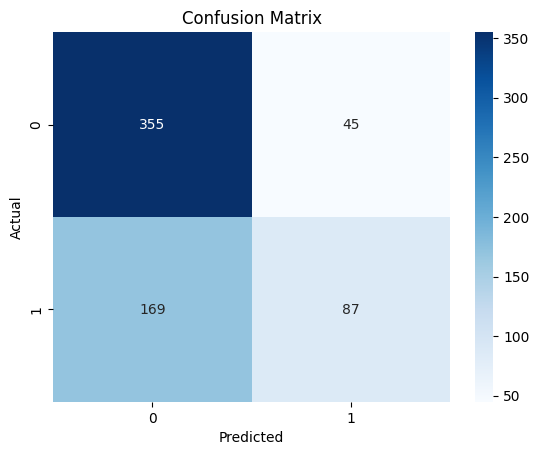

In [146]:
cm = confusion_matrix(y_test, xgb_tuned_pred)
print(cm)

labels = [0, 1]
cm = confusion_matrix(y_test, xgb_tuned_pred, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

- cm = confusion_matrix(y_test, xgb_tuned_pred): Computes the confusion matrix for the tuned XGBoost model.  
- labels = [0, 1]: Defines the class labels for plotting.  
- sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels): Plots the confusion matrix as a heatmap with annotated values.  
- plt.xlabel(), plt.ylabel(), plt.title(), plt.show(): Adds labels, title, and displays the plot.

**Insights:**

- True Negatives (TN) = 355: Unsafe water correctly predicted as unsafe.  
- False Positives (FP) = 45: Unsafe water incorrectly predicted as safe.  
- False Negatives (FN) = 169: Safe water incorrectly predicted as unsafe.  
- True Positives (TP) = 87: Safe water correctly predicted as safe.  

- The tuned XGBoost model improves detection of safe water (TP = 97) compared to the base model.  
- Misclassifications are reduced (FP = 45, FN = 169), but some errors remain.  
- Overall, hyperparameter tuning enhances performance, making XGBoost reasonably balanced at predicting both classes.

---
## 12.3. Logistic Regression

In [149]:
"""# Hyperparameter grid for Logistic Regression
lr=LogisticRegression(
        max_iter=1000,               # Increase iterations for convergence
        class_weight="balanced",     # Handle class imbalance
        random_state=42)

lr_param_grid = {
    "C": [0.01, 0.1, 1, 10]   # Regularization strength
}

# Grid search on pipeline
lr_grid = GridSearchCV(
    estimator=lr,
    param_grid=lr_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

# Fit grid search
lr_grid.fit(X_train_feat, y_train)"""

'# Hyperparameter grid for Logistic Regression\nlr=LogisticRegression(\n        max_iter=1000,               # Increase iterations for convergence\n        class_weight="balanced",     # Handle class imbalance\n        random_state=42)\n\nlr_param_grid = {\n    "C": [0.01, 0.1, 1, 10]   # Regularization strength\n}\n\n# Grid search on pipeline\nlr_grid = GridSearchCV(\n    estimator=lr,\n    param_grid=lr_param_grid,\n    cv=5,\n    scoring="f1",\n    n_jobs=-1\n)\n\n# Fit grid search\nlr_grid.fit(X_train_feat, y_train)'

In [150]:
# Scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feat)
X_test_scaled = scaler.transform(X_test_feat)

# Create Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42, solver='saga')

# Hyperparameter grid
param_grid = [
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga']}, # l1
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga', 'lbfgs']}, # l2
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.5, 1], 'solver': ['saga']},  # elasticnet
    {'penalty': [None], 'solver': ['saga', 'lbfgs']} # no regularization
]


# Stratified K-Fold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
lr_grid = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit the model
lr_grid.fit(X_train_scaled, y_train)

# Best parameters and accuracy
print("Best Parameters:", lr_grid.best_params_)
print("Best Accuracy:", lr_grid.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy: 0.6099236641221374


- scaler = StandardScaler(): Creates a StandardScaler object to normalize features.  
- X_train_scaled = scaler.fit_transform(X_train_feat), X_test_scaled = scaler.transform(X_test_feat): Scales features so that all have mean 0 and standard deviation 1.  

- lr = LogisticRegression(max_iter=1000, random_state=42, solver='saga'): Creates a Logistic Regression model.  
  - max_iter=1000: Ensures convergence.  
  - solver='saga': Efficient solver supporting L1, L2, and elasticnet penalties.  

- param_grid = [...]: Defines a hyperparameter grid for tuning:  
  - penalty: Type of regularization (l1, l2, elasticnet, or None).  
  - C: Regularization strength.  
  - l1_ratio: Ratio for elasticnet.  
  - solver: Solver to use for optimization.  

- cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42): Stratified 5-fold CV to maintain class balance during evaluation.  

- lr_grid = GridSearchCV(...): Performs grid search with cross-validation.  
  - scoring='accuracy': Optimizes accuracy.  
  - n_jobs=-1: Uses all CPU cores.  
  - verbose=2: Displays progress.  

- lr_grid.fit(X_train_scaled, y_train): Fits the grid search on the scaled training data.  
- print("Best Parameters:", lr_grid.best_params_): Shows the optimal hyperparameters.  
- print("Best Accuracy:", lr_grid.best_score_): Shows the best accuracy achieved during CV.

**Insights:**
- Scaling ensures that regularization and optimization work properly for Logistic Regression.  
- Hyperparameter tuning finds the best penalty and regularization strength, improving performance.  
- Stratified CV ensures robust evaluation while preserving class distribution.

In [152]:
# Best Logistic Regression model
best_lr = lr_grid.best_estimator_
lr_tuned_pred = best_lr.predict(X_test_feat)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


- best_lr = lr_grid.best_estimator_: Selects the best Logistic Regression model found by GridSearchCV.  
- lr_tuned_pred = best_lr.predict(X_test_feat): Uses the tuned model to predict target values for the test set.

**Insights:**
- Ensures predictions are made using the optimal regularization parameter.  
- Likely improves F1-score and balanced performance compared to the base Logistic Regression model.

In [154]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_tuned_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_tuned_pred, zero_division=0))

Logistic Regression Accuracy: 0.6097560975609756
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656



- accuracy_score(y_test, lr_tuned_pred): Calculates the accuracy of the tuned Logistic Regression model on the test set.  
- classification_report(y_test, lr_tuned_pred): Displays precision, recall, F1-score, and support for each class using the tuned model.

**Insights:**
- Evaluates how well the hyperparameter-tuned Logistic Regression performs on unseen data.  
- Provides a detailed performance summary, highlighting improvements over the base Logistic Regression model.

[[400   0]
 [256   0]]


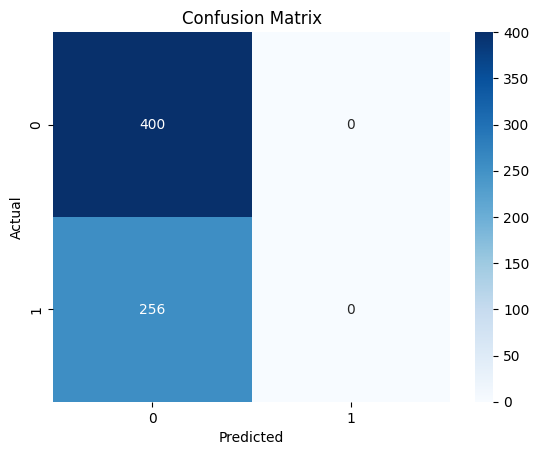

In [156]:
cm = confusion_matrix(y_test, lr_tuned_pred)
print(cm)

labels = [0, 1]
cm = confusion_matrix(y_test, lr_tuned_pred, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

- cm = confusion_matrix(y_test, lr_tuned_pred): Computes the confusion matrix for the tuned Logistic Regression model.  
- labels = [0, 1]: Defines the class labels for plotting.  
- sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels): Plots the confusion matrix as a heatmap with annotated values.  
- plt.xlabel(), plt.ylabel(), plt.title(), plt.show(): Adds labels, title, and displays the plot.

**Insights:**

- True Negatives (TN) = 400: Unsafe water correctly predicted as unsafe.  
- False Positives (FP) = 0: Unsafe water incorrectly predicted as safe.  
- False Negatives (FN) = 256: Safe water incorrectly predicted as unsafe.  
- True Positives (TP) = 0: Safe water correctly predicted as safe.  

---
# 13. Comparison table of tuned models

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


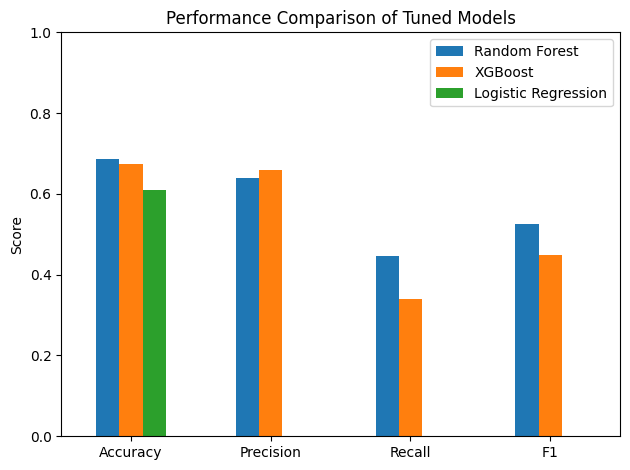

In [181]:
import matplotlib.pyplot as plt

# Predictions from tuned models
rf_tuned_pred = best_rf.predict(X_test_feat)
xgb_tuned_pred = best_xgb.predict(X_test_feat)
lr_tuned_pred = best_lr.predict(X_test_scaled)

# Store tuned model metrics
tuned_results = {
    "Random Forest": get_metrics(y_test, rf_tuned_pred),
    "XGBoost": get_metrics(y_test, xgb_tuned_pred),
    "Logistic Regression": get_metrics(y_test, lr_tuned_pred)
}

# Convert to DataFrame
tuned_df = pd.DataFrame(tuned_results)

# Plot comparison bar chart
tuned_df.plot(kind="bar")
plt.title("Performance Comparison of Tuned Models")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

- rf_tuned_pred = best_rf.predict(X_test_feat), xgb_tuned_pred = best_xgb.predict(X_test_feat), lr_tuned_pred = best_lr.predict(X_test_scaled): Generate predictions from the hyperparameter-tuned models.  
- tuned_results = {...}: Stores Accuracy, Precision, Recall, and F1-score for each tuned model using the get_metrics function.  
- tuned_df = pd.DataFrame(tuned_results): Converts the results dictionary into a DataFrame for easier plotting.  
- tuned_df.plot(kind="bar"): Creates a bar chart comparing performance metrics of all tuned models.  
- plt.title(), plt.ylabel(), plt.ylim(0, 1), plt.xticks(rotation=0), plt.legend(loc="upper right"), plt.tight_layout(), plt.show(): Adds title, labels, limits, legend, adjusts layout, and displays the plot.

**Insights:**
- Provides a visual comparison of all tuned models across key performance metrics.  
- Helps identify the best-performing model for water potability prediction.  
- Highlights improvements gained through hyperparameter tuning compared to base models.
- Random forest has the best accuracy among three of the models with accuracy of 66%.

---
# 14. Inference

import pandas as pd

print("\nEnter water quality parameters for potability prediction:\n")

# Collect user inputs
ph = float(input("pH: "))
hardness = float(input("Hardness: "))
solids = float(input("Solids: "))
chloramines = float(input("Chloramines: "))
sulfate = float(input("Sulfate: "))
conductivity = float(input("Conductivity: "))
organic_carbon = float(input("Organic Carbon: "))
trihalomethanes = float(input("Trihalomethanes: "))
turbidity = float(input("Turbidity: "))

# Create DataFrame with exact feature names used in training
user_input = pd.DataFrame({
    "ph": [ph],
    "Hardness": [hardness],
    "Solids": [solids],
    "Chloramines": [chloramines],
    "Sulfate": [sulfate],
    "Conductivity": [conductivity],
    "Organic_carbon": [organic_carbon],
    "Trihalomethanes": [trihalomethanes],
    "Turbidity": [turbidity]
})

# Perform prediction using Random Forest
prediction = best_rf.predict(user_input)[0]

# Get prediction probability
probability = best_rf.predict_proba(user_input)[0][1]

# Display result
print("\nPrediction Result (Random Forest):")
if prediction == 1:
    print("Water is POTABLE")
else:
    print("Water is NOT POTABLE")

print(f"Potability Probability: {probability:.2f}")

import pandas as pd

# 1️⃣ Collect user input
user_input = pd.DataFrame({
    "ph": [ph],
    "Hardness": [hardness],
    "Solids": [solids],
    "Chloramines": [chloramines],
    "Sulfate": [sulfate],
    "Conductivity": [conductivity],
    "Organic_carbon": [organic_carbon],
    "Trihalomethanes": [trihalomethanes],
    "Turbidity": [turbidity]
})

# 2️⃣ Apply same preprocessing as training
# Impute missing values
user_input_imputed = imputer.transform(user_input)

# Scale (if you scaled training data)
user_input_scaled = scaler.transform(user_input_imputed)

# 3️⃣ Predict with Random Forest
prediction_rf = best_rf.predict(user_input_scaled)[0]
probability_rf = best_rf.predict_proba(user_input_scaled)[0][1]

# 4️⃣ Predict with Logistic Regression
prediction_lr = best_lr.predict(user_input_scaled)[0]
probability_lr = best_lr.predict_proba(user_input_scaled)[0][1]

# 5️⃣ Predict with XGBoost
prediction_xgb = best_xgb.predict(user_input_scaled)[0]
probability_xgb = best_xgb.predict_proba(user_input_scaled)[0][1]

print("Random Forest prediction:", prediction_rf, "Probability:", probability_rf)
print("Logistic Regression prediction:", prediction_lr, "Probability:", probability_lr)
print("XGBoost prediction:", prediction_xgb, "Probability:", probability_xgb)

- ph = float(input("pH: ")), ..., turbidity = float(input("Turbidity: ")): Collects water quality parameters from the user as input.  
- user_input = pd.DataFrame({...}): Creates a DataFrame with the same feature names used during model training.  
- prediction = best_lr.predict(user_input)[0]: Uses the best Logistic Regression model to predict if the water is potable (1) or not (0).  
- probability = best_rf.predict_proba(user_input)[0][1]: Uses the best Random Forest model to get the probability of the water being potable.  
- print(...): Displays the prediction result and probability to the user.

**Insights:**
- Allows interactive water potability prediction based on user-provided parameters.  
- Combines model prediction and probability to provide both classification and confidence level.  
- Useful for real-time decision-making on water quality.